### Visualizing Time Series Data in Python | 04-Work with Multiple Time Series

#### `01: Load multiple time series`
Whether it is during personal projects or your day-to-day work as a Data Scientist, it is likely that you will encounter situations that require the analysis and visualization of multiple time series at the same time.

Provided that the data for each time series is stored in distinct columns of a file, the pandas library makes it easy to work with multiple time series. In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.

We've imported `pandas` using the `pd` alias.

- Read in the the csv file located at `url_meat` into a DataFrame called `meat`.
- Convert the `date` column in `meat` to the `datetime` type.
- Set the `date` column as the index of `meat`.
- Print the summary statistics of all the numeric columns in `meat`.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
url_meat = "datasets/ch4_meat.csv"

In [6]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken   
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN  \
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers   
count   827.000000  827.000000   827.000000       827.000000   635.000000  \
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

#### `02: Visualize multiple time series`
If there are multiple time series in a single DataFrame, you can still use the `.plot()` method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.

With the `pandas` library, you can simply leverage the `.plot.area()` method to produce area charts of the time series data in your DataFrame.

- Plot all the time series data in the `meat` DataFrame.
- Make sure to specify a line width of 2 and a font size of 12.

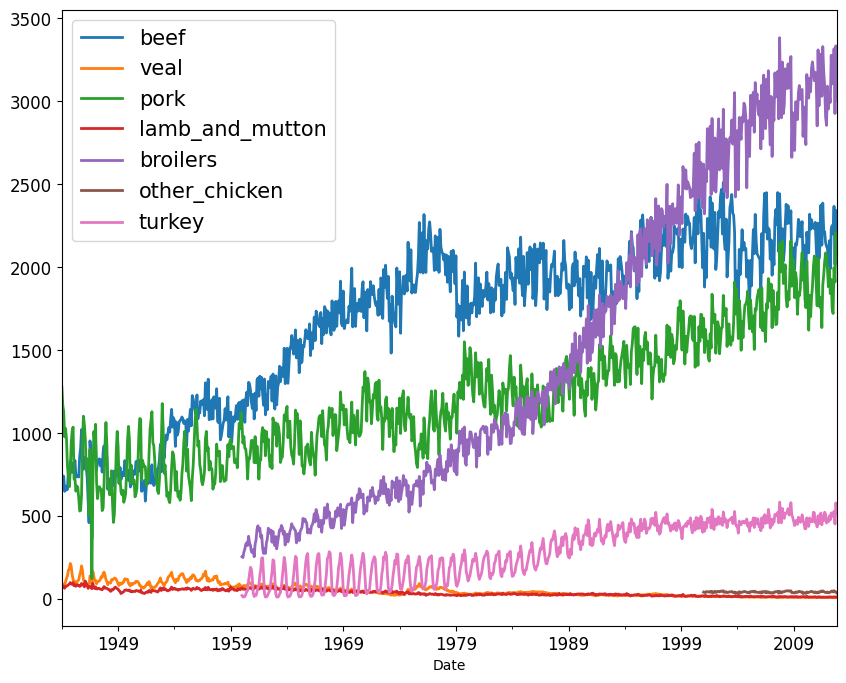

In [10]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12, figsize=(10, 8))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

Plot an area chart all the time series data in the meat DataFrame.



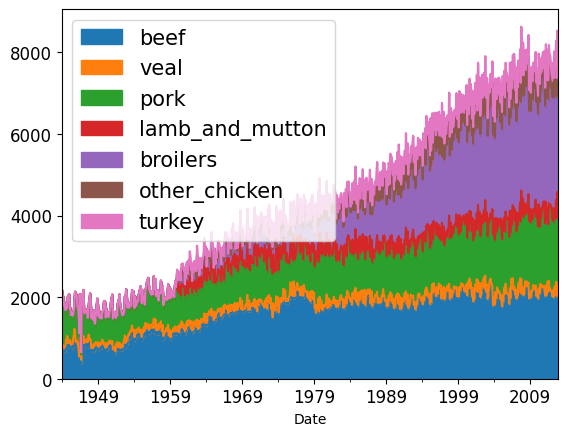

In [11]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

Well done! It looks the time series in the meat DataFrame have very different growth rates!



#### `03: Statistical summaries of multiple time series`
As seen in the last exercise, the time series in the meat DataFrame display very different behavior over time.

Using the summary statistics presented on your right, can you identify the time series with the highest mean and maximum value, respectively?




In [12]:
meat.describe()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


- `beef` has the highest mean and maximum values.
- `pork` has the highest mean and `broilers` has the maximum value.
- `beef` has the highest mean and `broilers` has the maximum value. ✅
- `broilers` has the highest mean and maximum values.

Excellent! Being able to work with multiple time series is a very valuable skill in Data Science, so let's continue!



#### `04: Define the color palette of your plots`
When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the `colormap` argument to `.plot()` to automatically assign specific color palettes with varying contrasts. You can either provide a `matplotlib colormap` as an input to this parameter, or provide one of the default strings that is available in the `colormap()` function available in `matplotlib` (all of which are available here).

For example, you can specify the `'viridis'` colormap using the following command:

`df.plot(colormap='viridis')`

- Plot the time series data in the `meat` DataFrame and set the color palette to `'cubehelix'`.



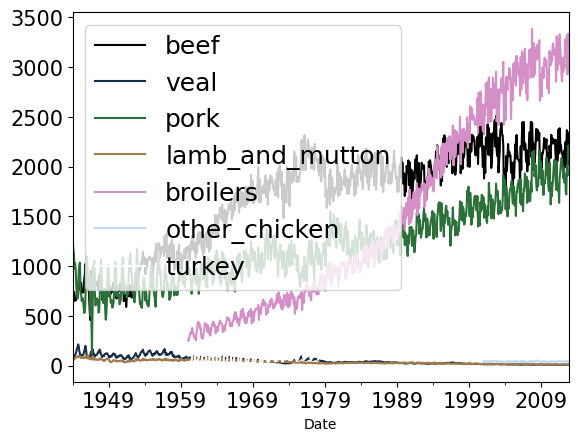

In [18]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

- Plot the time series data in the `meat` DataFrame and set the color palette to `'PuOr'`.



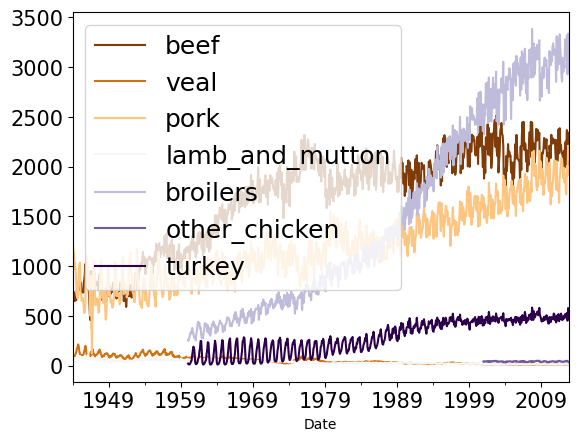

In [17]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

#### `05: Add summary statistics to your time series plot`
It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the table method:

```
# Plot the time series data in the DataFrame
ax = df.plot()

# Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values, 
         colWidths=[0.3]*len(df.columns), 
         rowLabels=df_summary.index, 
         colLabels=df_summary.columns, 
         loc='top')
``` 


In [37]:
meat_mean= meat.mean()
meat_mean = pd.DataFrame({'mean': meat_mean}).T
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


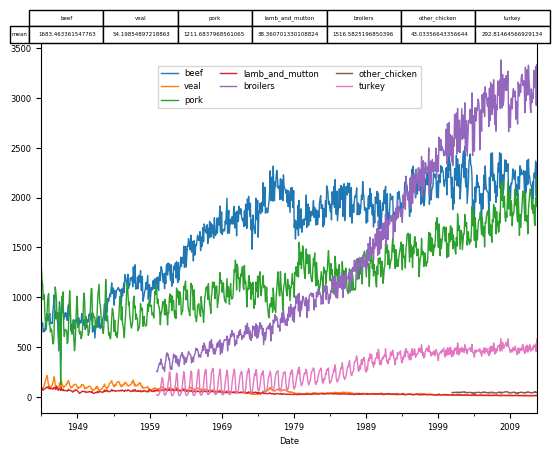

In [38]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)
# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

#### `06: Plot your time series on individual plots`
It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the `subplots` argument to `True`. In addition, the arguments that can be added are:

`layout`: specifies the number of `rows x columns` to use.
`sharex` and `sharey`: specifies whether the x-axis and y-axis values should be shared between your plots.

- Create a facetted plot of the `meat` DataFrame using a layout of 2 rows and 4 columns.
- Ensure that the subgraphs do not share x-axis and y-axis values.

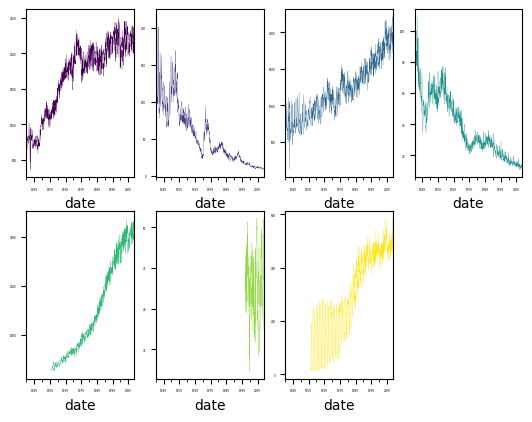

In [39]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

Excellent Job! You've gotten really good at plotting data from DataFrames that contain multiple time series!



### `07: Compute correlations between time series`
The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.

Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

- Print the correlation matrix between the beef and pork columns in the `meat` DataFrame using the Spearman method.
- Based on the above matrix, print the correlation value between beef and pork columns.

In [42]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.828


- Compute the correlation between the pork, veal and turkey columns in `meat` using the Pearson method. Based on these results, print the correlation between:
    - veal and pork
    - veal and turkey
    - pork and turkey

In [43]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.809
-0.768
0.835


We will now plot the correlations between all pairs of time series in meat!



#### `08: Visualize correlation matrices`
The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.
```
df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
``` 

You can use the `.xticks()` and `.yticks()` methods to rotate the axis labels so they don't overlap.
To learn about the arguments to the `heatmap()` function, refer to this page.

- Import `seaborn` as `sns`.
- Compute the correlation between all columns in the `meat` DataFrame using the Spearman method and assign the results to a new variable called `corr_meat`.
- Plot the heatmap of `corr_meat`.

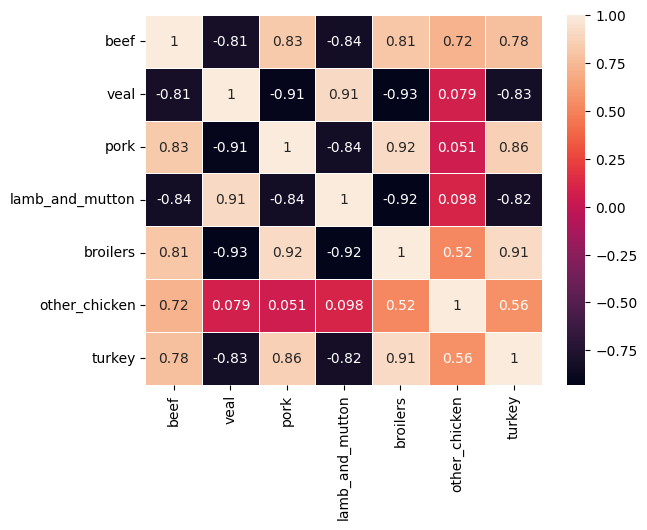

In [45]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

#### `09: Clustered heatmaps`
Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
To prevent overlapping of axis labels, you can reference the Axes from the underlying fig object and specify the rotation. You can learn about the arguments to the clustermap() function here.

- Import `seaborn` as `sns`.
- Compute the correlation between all columns in the `meat` DataFrame using the Pearson method and assign the results to a new variable called `corr_meat`.
- Plot the clustermap of `corr_meat`.

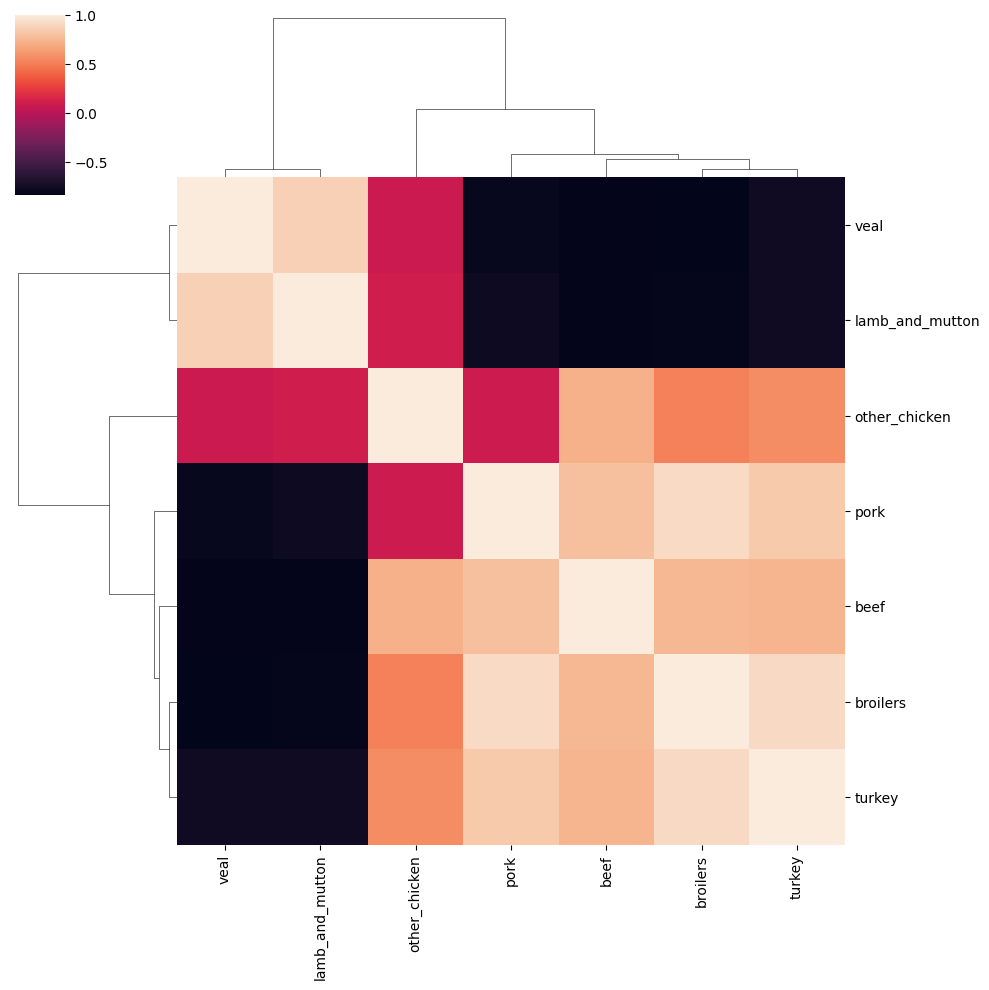

In [47]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap (corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()